## DataFrames and Series
#### Exploring the NSFG data
To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called nsfg.

In [2]:
import pandas as pd
nsfg = pd.read_hdf("nsfg.hdf5")
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [3]:
nsfg.shape

(9358, 10)

In [4]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [5]:
# Select column birthwgt_oz1: ounces
ounces = nsfg["birthwgt_oz1"]

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


Nice job! Remember these attributes and methods; they are useful when you are exploring a new dataset. It's now time to check for errors and prepare the data for analysis. Keep going!

## Clean and Validate
#### Validate a variable
In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:<br>
<br>
value	label<br>
1	Live birth<br>
2	Induced abortion<br>
3	Stillbirth<br>
4	Miscarriage<br>
5	Ectopic pregnancy<br>
6	Current pregnancy<br>
The nsfg DataFrame has been pre-loaded for you. Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question: How many pregnancies in this dataset ended with a live birth?<br>
<br>


In [6]:
nsfg["outcome"].value_counts()

outcome
1    6489
4    1469
2     947
6     249
5     118
3      86
Name: count, dtype: int64

In [7]:
nsfg["outcome"].value_counts(normalize = True)

outcome
1    0.693417
4    0.156978
2    0.101197
6    0.026608
5    0.012610
3    0.009190
Name: proportion, dtype: float64

Possible Answers<br>
<br>
<strong>a.6489</strong><br>
b.9538<br>
c.1469<br>
d.6<br>

Correct! By comparing your results with the codebook, you confirm you are interpreting the data correctly.

#### Clean a variable
In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. Recall from the video how Allen replaced the values 98 and 99 in the ounces column using the .replace() method:

ounces.replace([98, 99], np.nan, inplace=True)

In [8]:
nsfg['nbrnaliv'].value_counts()

nbrnaliv
1.0    6379
2.0     100
3.0       5
8.0       1
Name: count, dtype: int64

In [9]:
import numpy as np

# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

nbrnaliv
1.0    6379
2.0     100
3.0       5
Name: count, dtype: int64


Excellent. If you are careful about this kind of cleaning and validation, it will save time (in the long run) and avoid potentially serious errors.

#### Compute a variable
For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

In [10]:
nsfg["agecon"].head()

0    2000
1    2291
2    3241
3    3650
4    2191
Name: agecon, dtype: int64

In [11]:
nsfg["agepreg"].head()

0    2075.0
1    2358.0
2    3308.0
3       NaN
4    2266.0
Name: agepreg, dtype: float64

In [12]:
# Select the columns and divide by 100
agecon = nsfg["agecon"]/100
agepreg = nsfg["agepreg"]/100

In [13]:
# Compute the difference
preg_length = agepreg - agecon
preg_length.head()

0    0.75
1    0.67
2    0.67
3     NaN
4    0.75
dtype: float64

In [14]:
# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


Good job. A variable that's computed from other variables is sometimes called a 'recode'. It's now time to get back to the motivating question for this chapter: what is the average birth weight for babies in the U.S.? See you in the next video!

## Filter and visualize
#### Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Data Visualization with Matplotlib course.

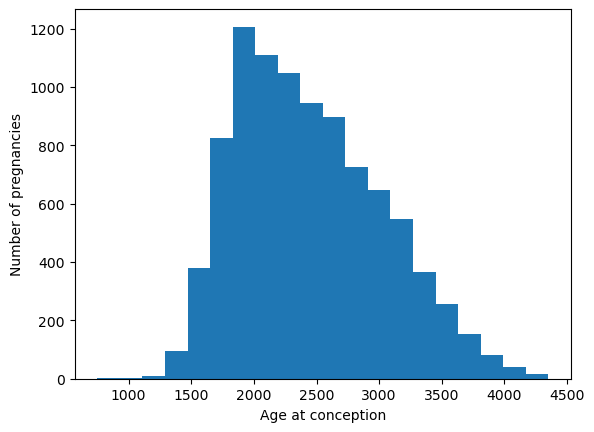

In [15]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.hist(nsfg["agecon"], bins = 20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

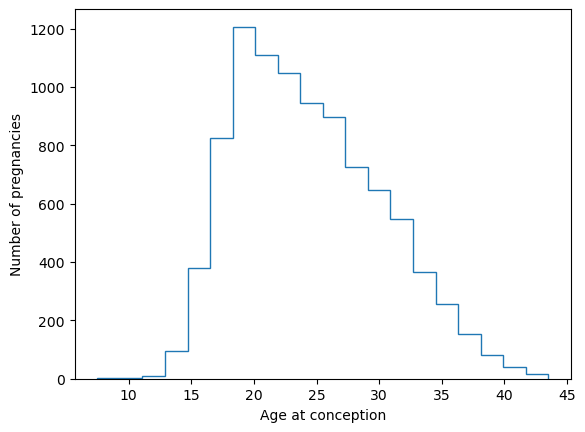

In [16]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

Nice job! matplotlib functions provide a lot of options; be sure to read the documentation so you know what they can do.

#### Compute birth weight

<br>
Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.<br>
<br>
I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.<br>
<br>
Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.<br>

######## Resample the data<br>
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')<br>
<br>
######## Clean the weight variables<br>
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)<br>
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)<br>
<br>
######## Compute total birth weight<br>
birth_weight = pounds + ounces/16<br>

In [17]:
birth_weight = nsfg["birthwgt_lb1"] + nsfg["birthwgt_oz1"]/16

# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.422858312113496


Nice job. You're almost done, but there's one last thing we have to check...

#### Filter
In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

In [18]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg["nbrnaliv"] == 1.0

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.4187798055759355
Multiple full-term mean: 7.90625


Congratulations on completing Chapter 1! Now that we have clean data, we're ready to explore. Coming up in Chapter 2, we'll look at distributions of variables in the General Social Survey and explore the relationship between education and income.